# Нейронные сети

Основная идея нейронных сетей — это обучение представления. Получение выхода из заданного выхода начинается с извлечения признаков, когда из входных данных извлекается некоторое промежуточное представление.

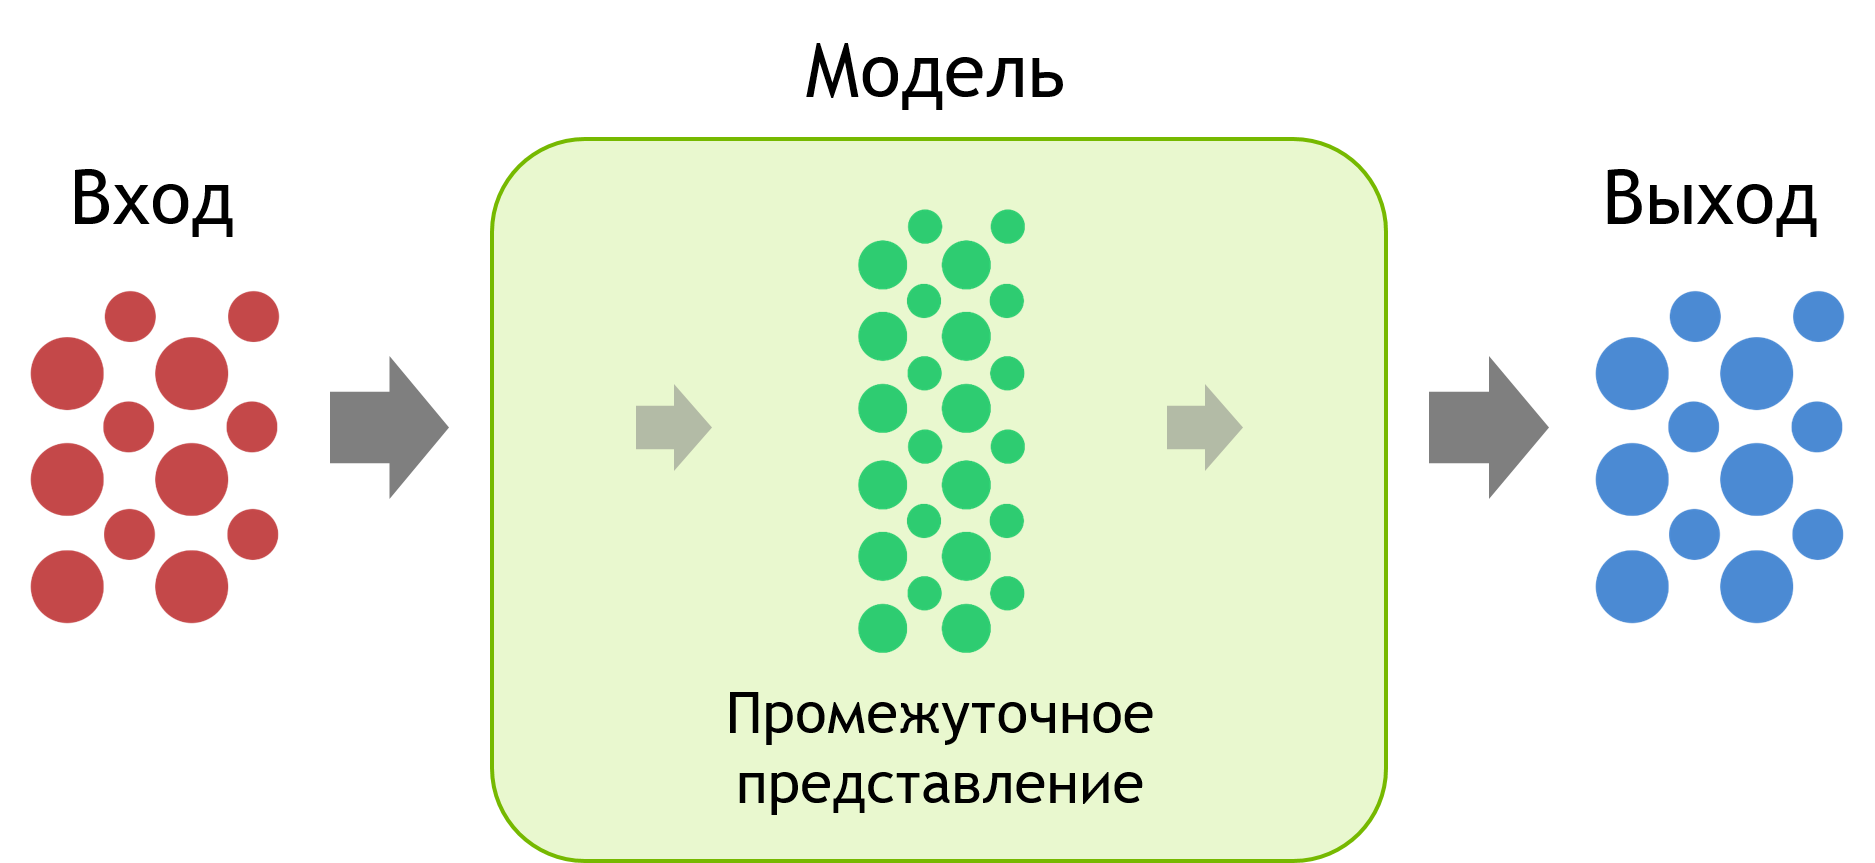

***Многослойный перцептрон***

Многослойный перцептрон — это простая нейронная сеть. Состоит из:
* входного вектора;
* выходного вектора;
* вектора промежуточного представления (скрытый слой).

Вычисление распространяется от входа к выходу, связям между нейронами соответствуют некоторые веса. Поэтому такая сеть является полносвязной.

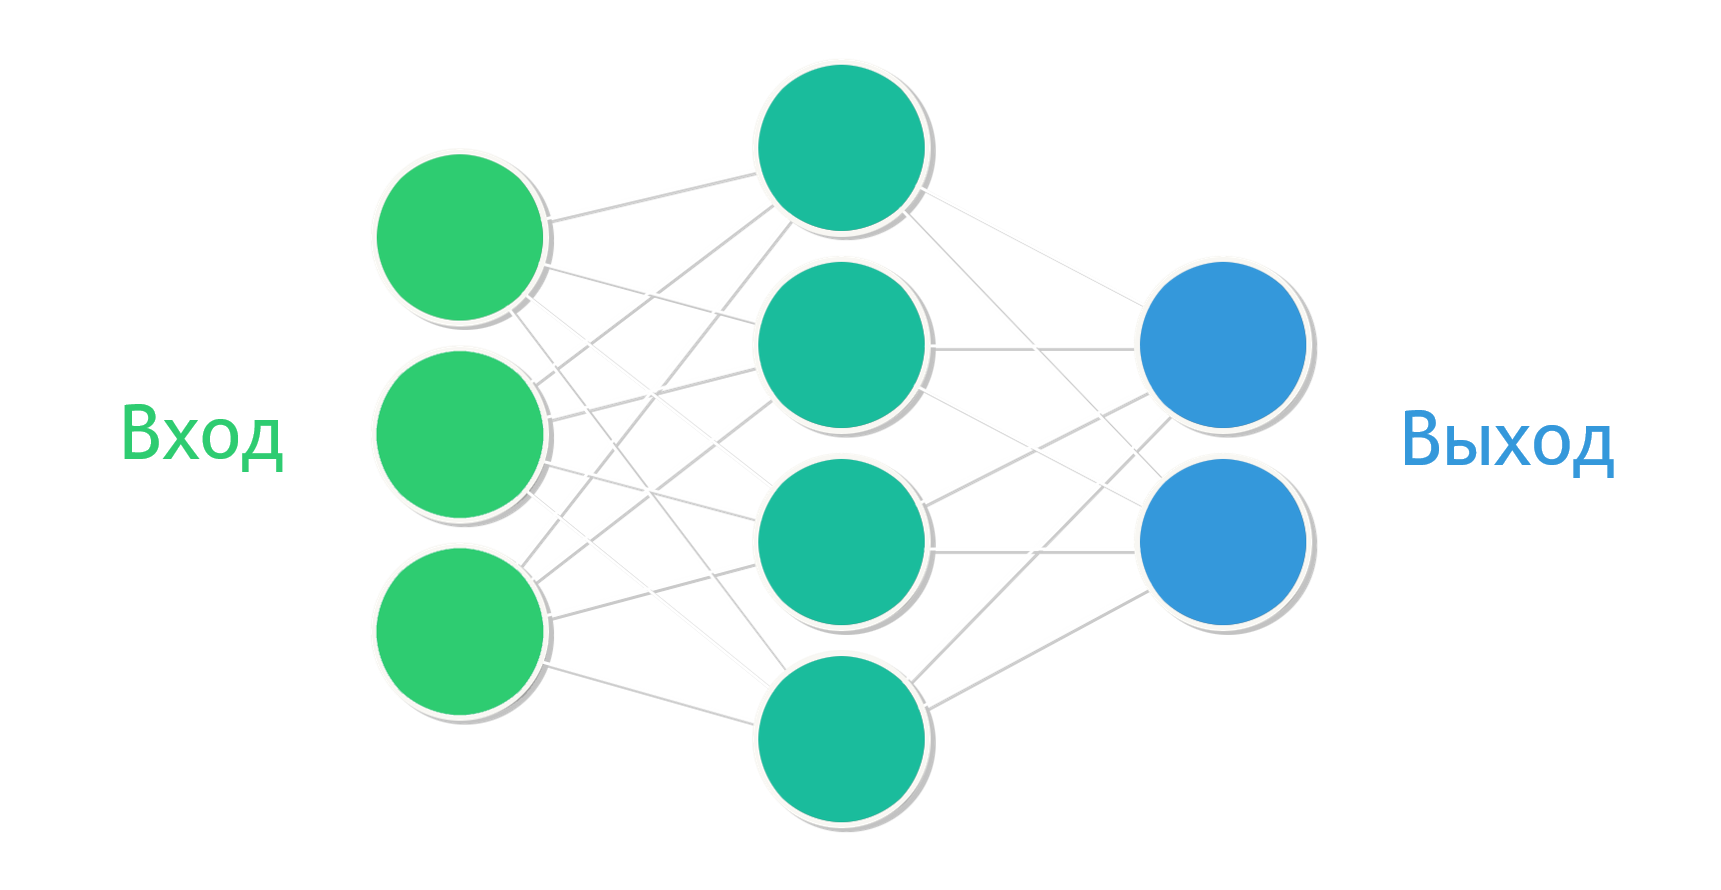

***Что в нейроне?***

В нейрон входит несколько значений x1, x2, x3 с несколькими связями. Связям соответствуют некоторые коэффициенты w1, w2, w3 (если у нас 3 входа в нейрон). 

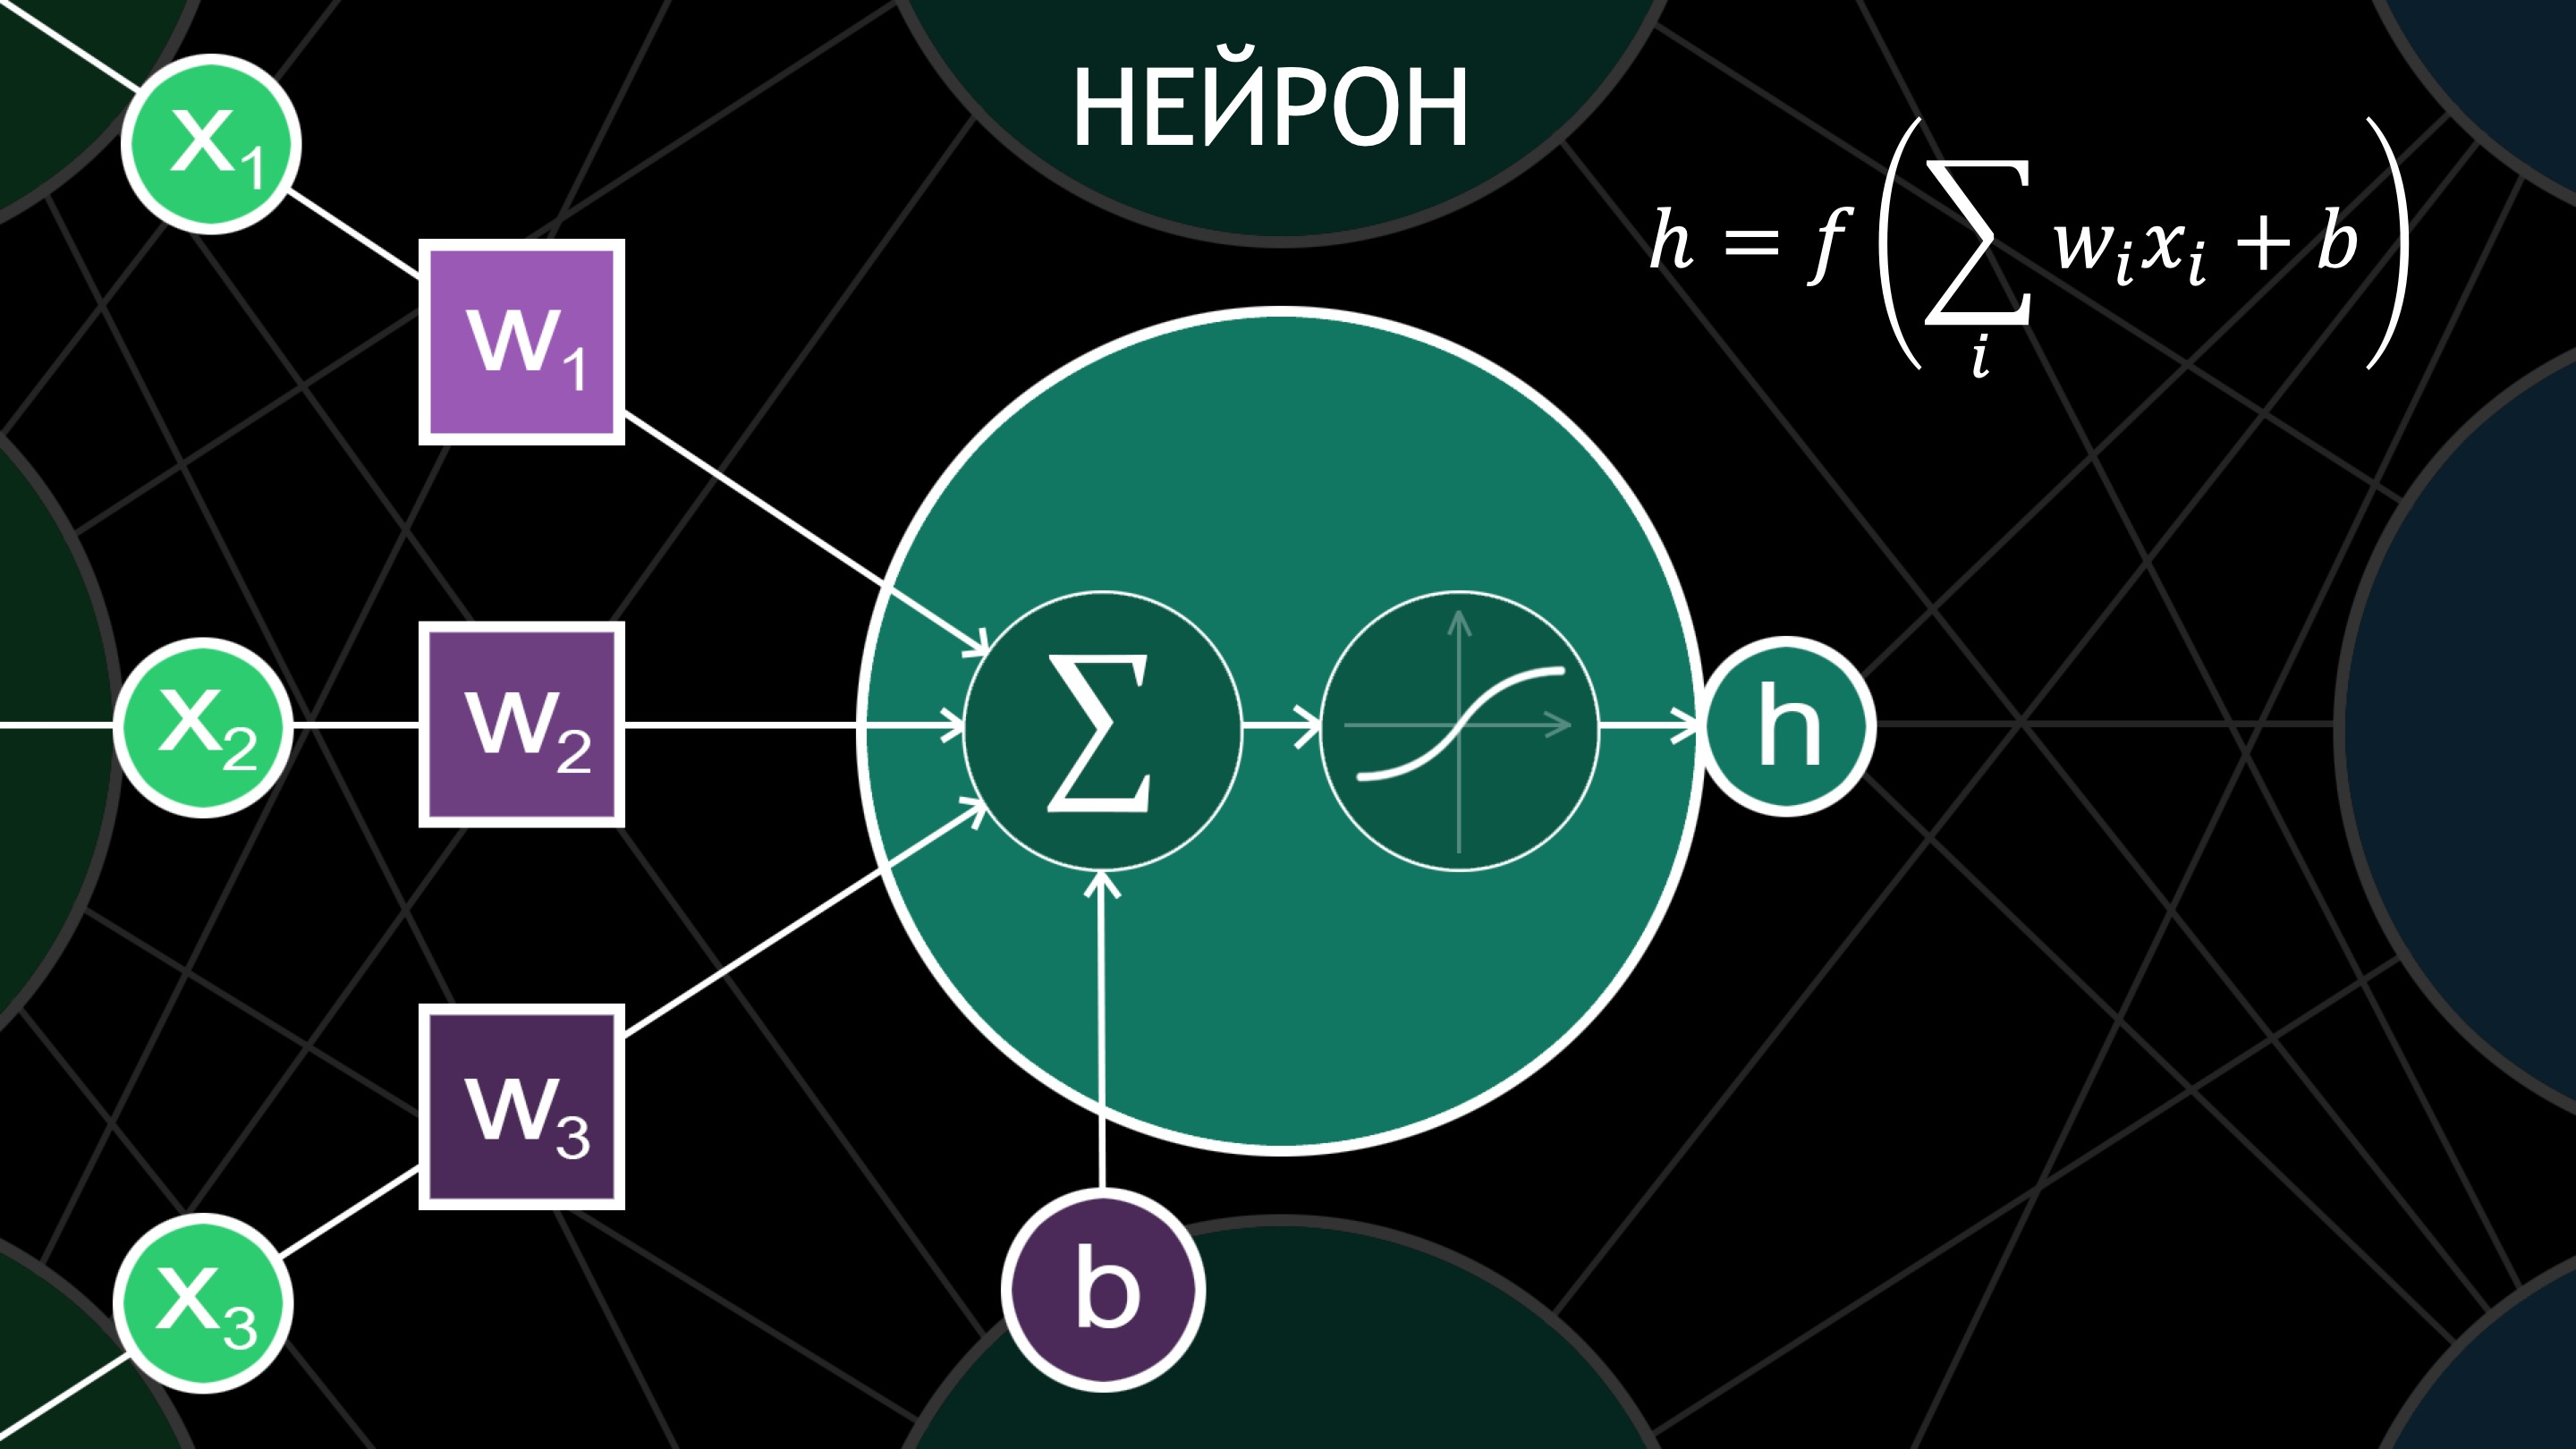

Дальше внутри нейрона происходит вычисление двух операций, а точнее композиция линейной и нелинейной операции:

* В линейной операции мы делаем взвешивание суммы всех входных значений (x1 умножаем на w1, x2 на w2 и так далее), всё это вместе суммируем и прибавляем некоторое значение смещения b. 
* В нелинейной операции от полученных на предыдущем шаге значений мы берём нелинейную функцию.

Так вычисляется выходное значение в одном нейроне. Дальше эти нейроны можно уже агрегировать в большую нейронную сеть.

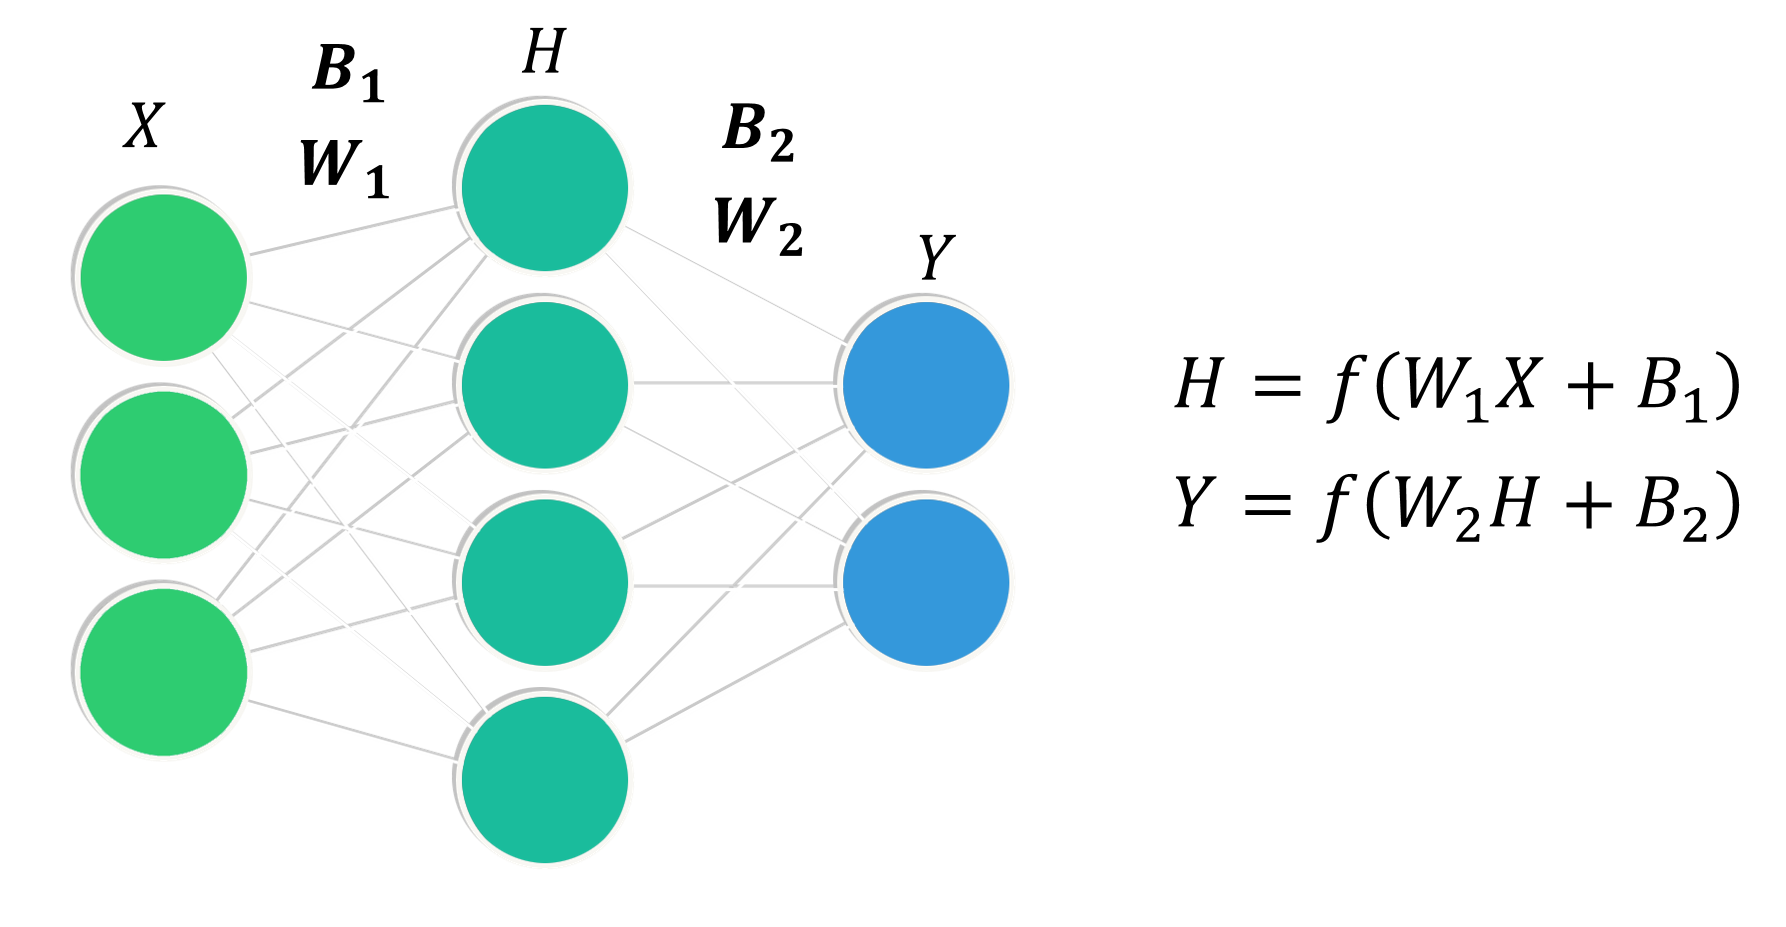

Одному слою такой нейронной сети уже будет соответствовать некоторая матрица параметров и некоторый вектор смещения B.

Таким образом проходят вычисления в одном слое полносвязной нейронной сети и вычисляется матричное умножение и прибавление вектора и потом взятие поэлементно нелинейности. 

***Как работают нейроны?***

В одном нейроне нейронной сети у нас происходит локальное принятие решения: мы взвешиваем и суммируем входные данные и на основе полученных результатов локально что-то предсказываем, принимая маленькое решение на каждом шаге. Все полученные решения агрегируются и подаются на следующий слой и уже новые значения используются для более сложного высокоуровнего принятия решений. 

В математическом смысле нейронная сеть — это универсальный аппроксиматор* (может аппроксимировать любую функцию).

Если у вас есть какая-то сложная зависимость между входом и выходом, то можно с помощью нейронной сети эту зависимость описать. 

Если брать больше слоев, то это уже будет многослойная нейронная сеть, и у неё уже будет более сложное промежуточное представление.

* Аппроксима́ция (от лат. proxima — ближайшая) или приближе́ние — научный метод, состоящий в замене одних объектов другими, в каком-то смысле близкими к исходным, но более простыми.

***Вычисления в многослойной нейронной сети***

Вычисления в такой сети можно записать с помощью следующего рекуррентного соотношения в многослойной нейронной сети:

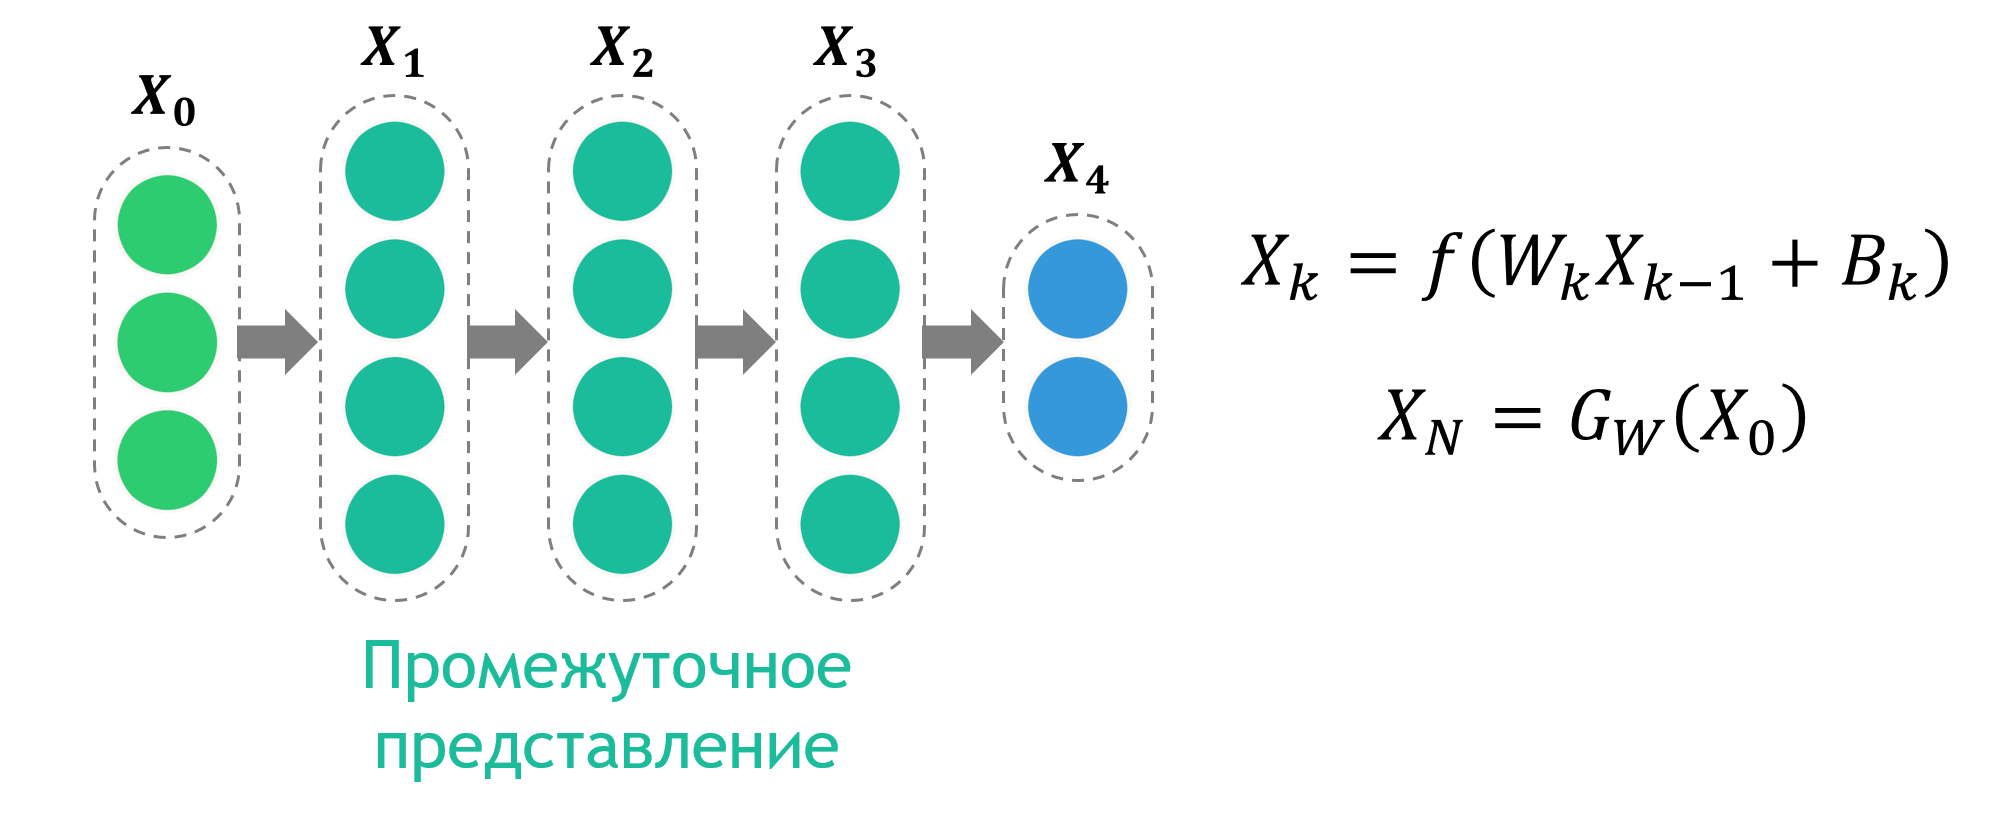

Выход каждого слоя это есть вход, умноженный на какую-то матрицу плюс вектор смещения и от всего этого берётся нелинейность. Все веса, которые соответствуют смещениям bias мы назовем параметрами нашей модели.

***Типы параметров нейронных сетей***

Обычно у нейронных сетей выделяют два типа параметров: просто параметры (W) и гиперпараметры.

Гиперпараметры — параметры нашей системы, которые мы не обучаем, а «создаём руками», как конструкторы проектируют нейронную сеть. Мы определяем количество нейронов в слое, количество слоёв, какую функцию активации мы используем и так далее. Это мы задаем вручную, а вот параметры связи между нейронами и bias — это вещи, которые получаются автоматически в процессе обучения.

***Какую функцию активации взять?***

Долгое время использовались сигмоидальные функции или sigmoid. В этой функции мы помогаем выходу из нейрона принять какое-то бинарное решение. То есть отображаем все его значения во что-то больше, или меньше нуля. Главное — что это нелинейная функция. 

Если бы мы использовали просто обычную линейную функцию (или вообще не использовали бы никакую функцию), то композиция слоёв без нелинейности давала бы нам одну большую линейную операцию. И поэтому не имела бы никакого смысла настраивать много слоёв в нейронной сети: они все были бы эквиваленты одному какому-то слою. 

А так, если мы ставим нелинейность между слоями, наш аппроксиматор становится более сложным, он уже может аппроксимировать достаточно сложные функции. Это функция sigmoid. Она использовалась раньше, но у неё есть некоторые проблемы и поэтому сейчас, как правило, используют функцию ReLU или ее модификации.

В этой функции всё, что меньше 0, мы зануляем, а всё, что больше 0, оставляем как есть. У этой функции очень простая производная, а именно производная этой функции будет участвовать в процессе обучения и в алгоритме обратного распространения ошибки. 

***Как применить нейронную сеть для задачи классификации?***

Представим, что у нас есть некоторые объекты признаковом пространстве. Объекты задаются тремя числами, и у нас есть три компонента этого вектора.

Мы так построили нашу нейронную сеть, что у неё есть три входных нейрона, как раз соразмерно нашему входному вектору. И, например, мы хотим сделать бинарную классификацию на 2 класса: фиолетовый и оранжевый. Поэтому мы сделали два выходных нейрона в нашей сети. Допустим, мы её уже как-то обучили. Так как ее теперь использовать?

Ставим на вход сети наш сектор из трёх компонентов, делаем прямое распространение,  по тем формулам, которые описаны выше, мы получаем два значения на выходе. Они уже отвечают на вопрос, к какому классу принадлежит наш объект, но ещё после некоторого специального нормирующего преобразования, мы получаем другие два числа: P1, P2. Именно они уже явно характеризуют вероятность  принадлежности к одному или второму классу. На выходе нейронной сети в случае классификации — распределение вероятностей принадлежности к тому или иному классу. 

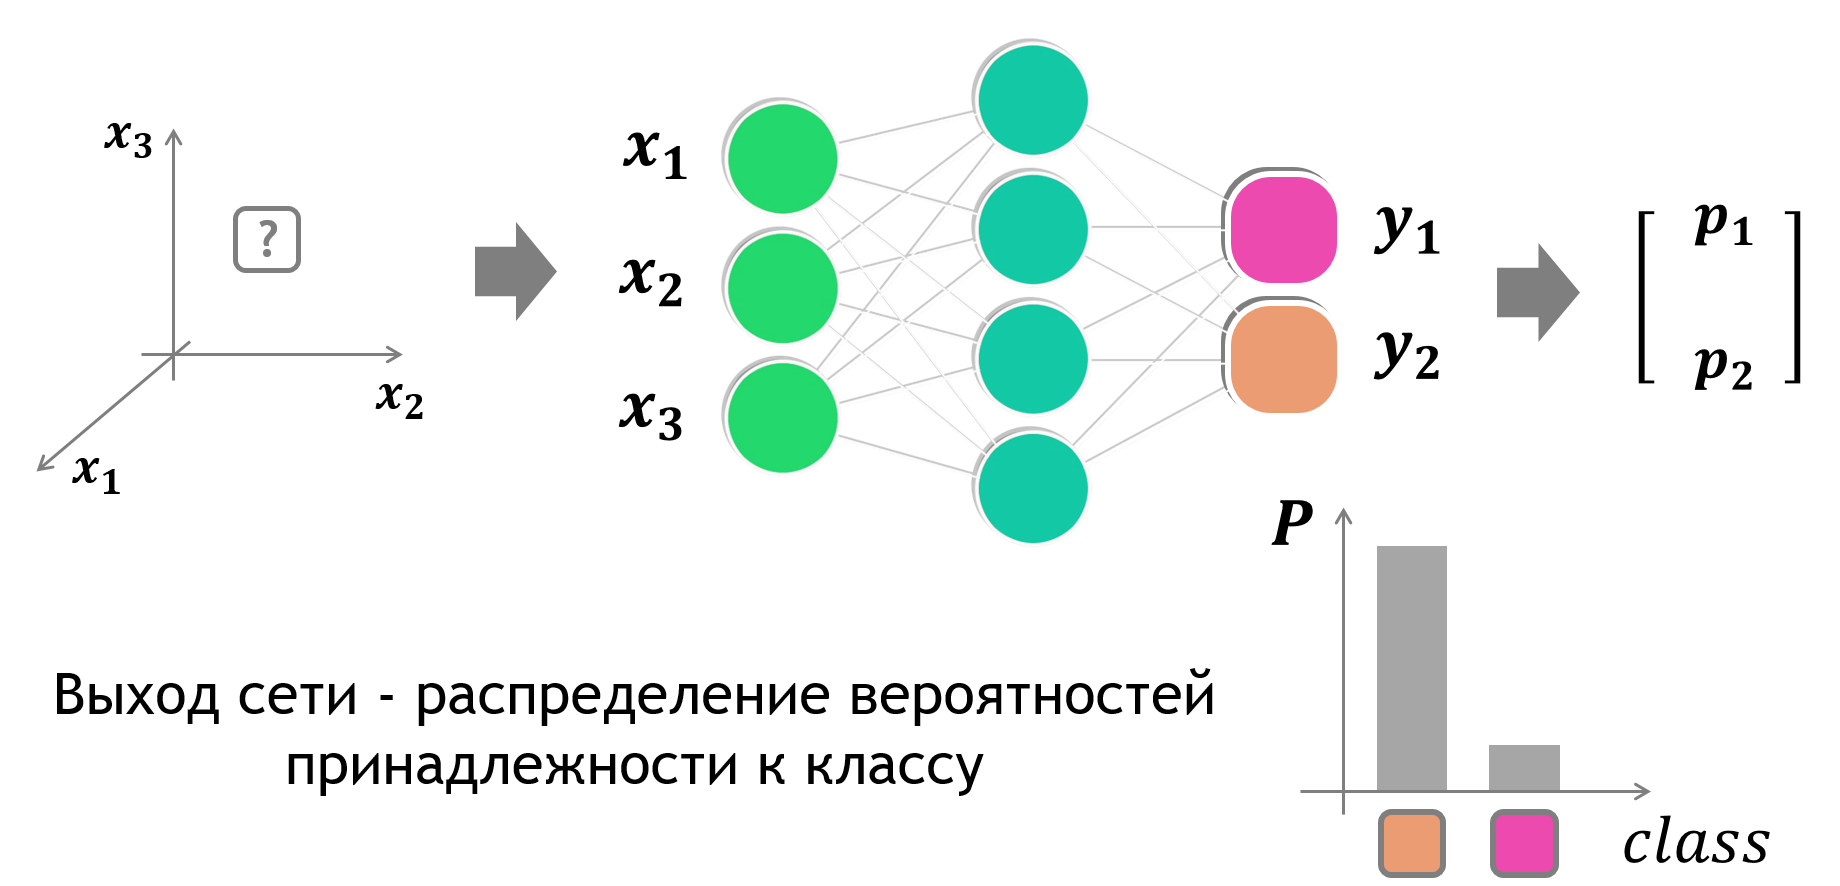